In [1]:
#import qiskit tools
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, Aer, IBMQ
from qiskit.tools.visualization import circuit_drawer
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
from qiskit.providers.aer import noise

#import python stuff
import matplotlib.pyplot as plt
import numpy as np
import time

# Set backend device, choose to use a simulator
sim = Aer.get_backend('aer_simulator')

# build circuit
qc = QuantumCircuit(2,2)
qc.h(0) # add a H gate on qubit 0
qc.cx(0, 1) # Add a CX (CNOT) gate on control qubit 0 and target qubit 1
qc.measure(range(2),range(2))

# show circuit
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

In [2]:
# run the test
num_of_shots = 10000
test = sim.run(qc, shots=num_of_shots)
results = test.result()
counts = results.get_counts(qc)

In [3]:
# print counts in theory
counts['10'] = 0
counts['01'] = 0

print(counts)

{'11': 4964, '00': 5036, '10': 0, '01': 0}


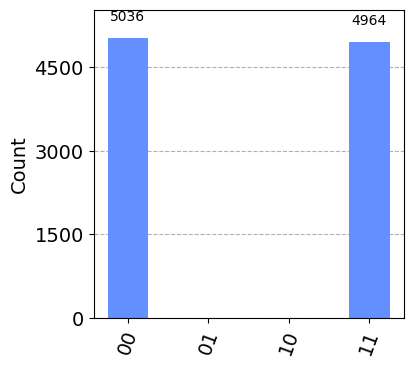

In [4]:
# plot the counts
plot_histogram(counts,figsize=(4,4))

In [5]:
# use snspd data
snspd_counts ={}
snspd_counts['00'] = counts['00']*0.78*0.78 + counts['10']*0.0035*0.78 + counts['01']*0.0035*0.78 + counts['11']*0.0035*0.0035
snspd_counts['10'] = counts['00']*0.0035*0.78 + counts['10']*0.81*0.78 + counts['01']*0.027*0.0035 + counts['11']*0.81*0.0035
snspd_counts['01'] = counts['00']*0.0035*0.78 + counts['10']*0.0035*0.027 + counts['01']*0.78*0.81 + counts['11']*0.81*0.0035
snspd_counts['11'] = counts['00']*0.027*0.027 + counts['10']*0.81*0.027 + counts['01']*0.027*0.81 + counts['11']*0.81*0.81
print(snspd_counts)

{'00': 3063.963209, '10': 27.821220000000004, '01': 27.821220000000004, '11': 3260.5516440000006}


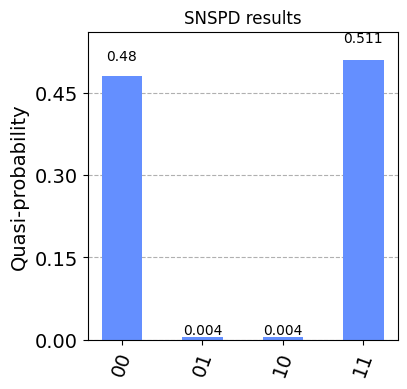

In [6]:
# plot the detector counts
plot_histogram(snspd_counts, title='SNSPD results',figsize=(4,4))